## O problema

Considere que uma empresa de pneus saiba que a duração de determinado tipo de pneu segue uma distribuição normal com média 60000 km e desvio padrão de 10000 km. Vamos simular o tempo de duração de um milhão de pneus, agrupando em conjuntos de 10 pneus. Vamos calcular a média de cada uma destes grupos de 10 pneus e vericar a distribuição das médias em cada grupo.

42.02088,54.76816,47.29679,75.94759,47.28602,74.04323,69.30729,53.28270,78.87192,64.37018
58.54399,59.87301,59.72730,54.56897,84.34206,62.10218,85.97546,63.70940,57.65587,65.63808
70.53972,57.00591,62.44690,47.01633,64.88163,72.35385,47.46172,69.79682,75.12271,48.08558
65.51741,50.11756,52.87960,80.50139,79.93509,71.71872,44.09021,55.58179,55.85854,75.45375
49.51175,62.14177,66.05635,60.52326,58.52896,55.94752,53.39853,64.53770,56.05423,45.54380
63.62877,54.72507,47.97129,62.29191,59.91612,41.77111,48.26790,71.88499,60.02149,59.70278


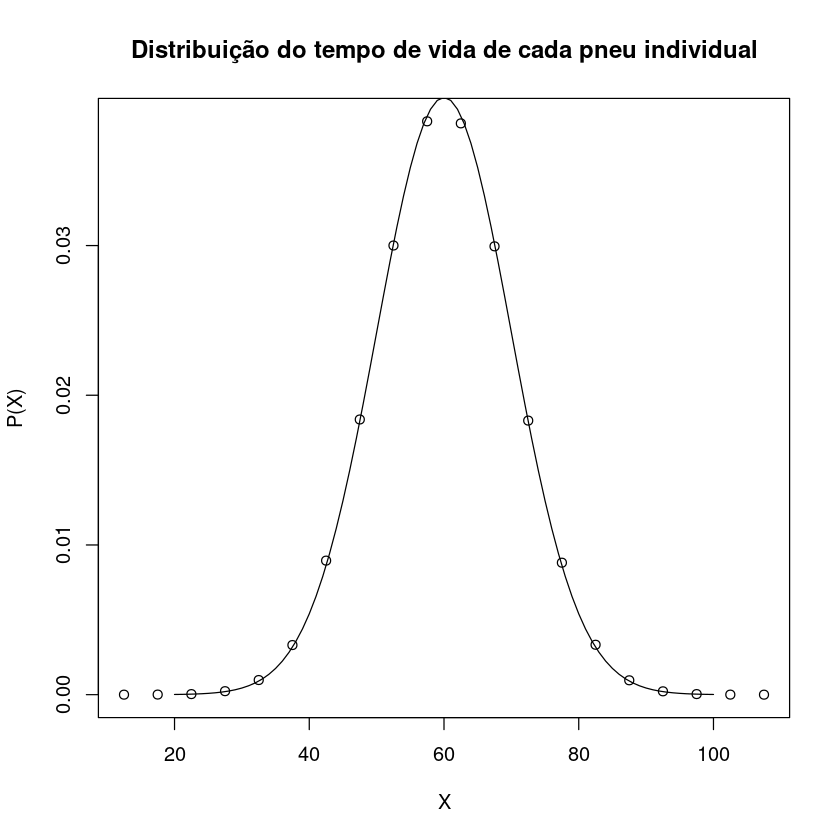

In [77]:
# aqui sorteamos um milhão de variáveis aleatórias, que vêm de uma 
# distribuição normal com média 60 (as unidades estão em mil km) e desvio padrão 10

media    <-60   # média da distribuição
dp       <-10   # desvio padrão
n_grupos <- 100000   # número de grupos
n        <- 10       # número de elementos por grupo

x<-rnorm(n * n_grupos, media, dp)

# vamos agrupar as variáveis em 100 mil grupos de 10 elementos cada
xarray<-matrix(x, n_grupos)
# vamos visualizar os primeiros 10 grupos
head(xarray)

#### visualizando a distribuição e comparando com a distribuição normal
h<-hist(x, plot=F) # criando o histograma dos dados brutos simulados
plot(h$mids,h$density,type="p",xlab="X", ylab="P(X)")  # gráfico dos dados brutos como pontos

### distribuição teórica ####
xp<-seq(media-4*dp, media+4*dp)   # 4 desvios-padrões para cada lado
lines(xp,dnorm(xp, media, dp))
#############################
title('Distribuição do tempo de vida de cada pneu individual')

In [75]:
# grau de confiança
confianca<-95 # em porcentagem

# encontrando os limites da média, para o grau de confiança dado
xmin<-qnorm((100-confianca)/200)*dp/sqrt(n)+media
xmax<--qnorm((100-confianca)/200)*dp/sqrt(n)+media

# colocando em tela os limites do intervalo de confiança
cat(paste('limite inferior:',xmin,'\n')) # limite inferior
cat(paste('limite superior:',xmax)) # limite superior

limite inferior: 53.8020496769544 
limite superior: 66.1979503230456

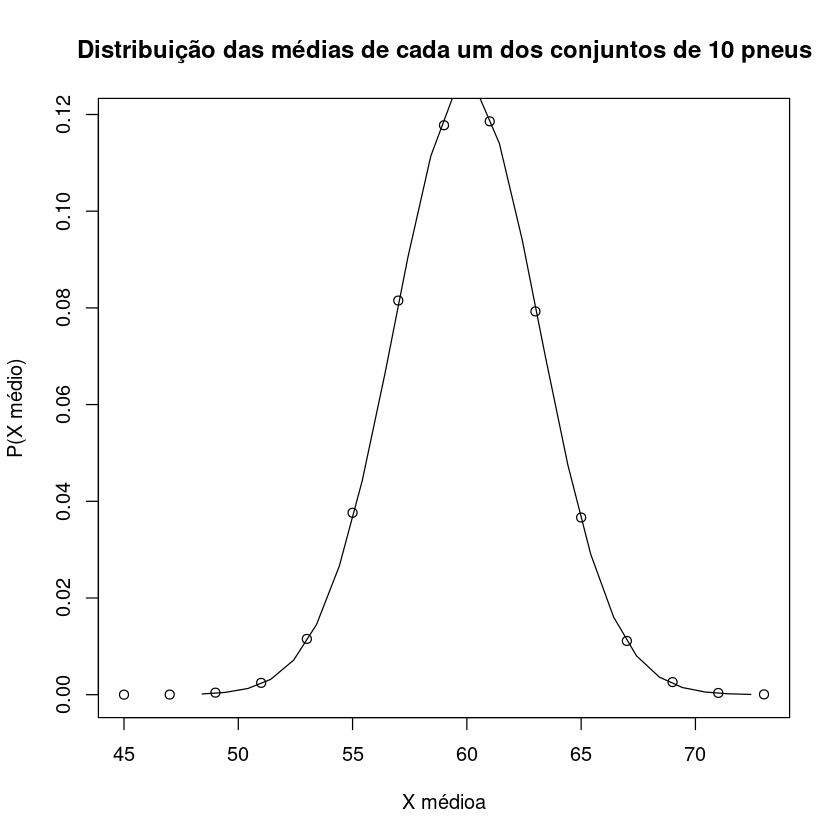

In [81]:
# fazendo as médias por linha
medias<-rowSums(xarray)/n

# visualizando as médias e comparando com a distribuição das médias
hm<-hist(medias, plot=F)
plot(hm$mids,hm$density,type="p",,xlab="X médioa", ylab="P(X médio)")
lines(seq(xmin*0.9,xmax*1.1),dnorm(seq(xmin*0.9,xmax*1.1), media, dp / sqrt(n)))
title('Distribuição das médias de cada um dos conjuntos de 10 pneus')

In [74]:
# Abaixo estou contando quantas das médias estão entre xmin e xmax 
# que são os limites do intervalo de confiança
# Ao dividir por 100000 (que é o número de grupos), temos contabilizada
# a proporção dos grupos que está dentro do intervalo de confiança. 
#
# Se tivermos feito tudo corretamente, então o valor obtido deve ser aproximadamente igual ao
# grau de confiança escolhido
cat (paste('valor simulado: ',sum(medias >= xmin & medias <= xmax)/n_grupos*100,'%\n'))
cat (paste('grau de confiança escolhido: ',confianca,'%'))

valor simulado:  94.942 %
grau de confiança escolhido:  95 %